In [169]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = loadarff('dataset_42_soybean.arff')
df = pd.DataFrame(raw_data[0])

df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,b'october',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-yr',b'low-areas',b'pot-severe',b'none',b'90-100',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
1,b'august',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-two-yrs',b'scattered',b'severe',b'fungicide',b'80-89',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
2,b'july',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-yr',b'scattered',b'severe',b'fungicide',b'lt-80',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
3,b'july',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-yr',b'scattered',b'severe',b'none',b'80-89',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
4,b'october',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-two-yrs',b'scattered',b'pot-severe',b'none',b'lt-80',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,b'april',b'?',b'?',b'?',b'?',b'?',b'upper-areas',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'2-4-d-injury'
679,b'april',b'lt-normal',b'?',b'lt-norm',b'?',b'diff-lst-year',b'scattered',b'?',b'?',b'?',...,b'?',b'dna',b'?',b'?',b'?',b'?',b'?',b'?',b'rotted',b'herbicide-injury'
680,b'june',b'lt-normal',b'?',b'lt-norm',b'?',b'diff-lst-year',b'scattered',b'?',b'?',b'?',...,b'?',b'dna',b'?',b'?',b'?',b'?',b'?',b'?',b'rotted',b'herbicide-injury'
681,b'april',b'lt-normal',b'?',b'lt-norm',b'?',b'same-lst-yr',b'whole-field',b'?',b'?',b'?',...,b'?',b'dna',b'?',b'?',b'?',b'?',b'?',b'?',b'rotted',b'herbicide-injury'


# Decoding Byte Literals to Strings

When viewing the dataframe, we note that each of the values in the dataframe are being read as byte literals rather than regular strings. Hence, the first step we need to do before proceeding is converting the byte literals back to regular strings through the utf-8 decoder. 

In [170]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

df.head(3)

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [171]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             683 non-null    object
 1   plant-stand      683 non-null    object
 2   precip           683 non-null    object
 3   temp             683 non-null    object
 4   hail             683 non-null    object
 5   crop-hist        683 non-null    object
 6   area-damaged     683 non-null    object
 7   severity         683 non-null    object
 8   seed-tmt         683 non-null    object
 9   germination      683 non-null    object
 10  plant-growth     683 non-null    object
 11  leaves           683 non-null    object
 12  leafspots-halo   683 non-null    object
 13  leafspots-marg   683 non-null    object
 14  leafspot-size    683 non-null    object
 15  leaf-shread      683 non-null    object
 16  leaf-malf        683 non-null    object
 17  leaf-mild        683 non-null    ob

It seems like there are no null values or rows with any empty values. However, there are other methods to check for this that we'll employ just to make sure there are no null values.

The first method is to read through the soybean dataset description found in the `dataset_42_soybean.arff` file.
Section 4 in the commented notes for this file states that "An unknown value is encoded as ``?``". 

Hence, rather than NaN being recorded for missing values, the ``?`` is used instead to denote a missing value.

In [172]:
df[(df == '?')].count()

date                 1
plant-stand         36
precip              38
temp                30
hail               121
crop-hist           16
area-damaged         1
severity           121
seed-tmt           121
germination        112
plant-growth        16
leaves               0
leafspots-halo      84
leafspots-marg      84
leafspot-size       84
leaf-shread        100
leaf-malf           84
leaf-mild          108
stem                16
lodging            121
stem-cankers        38
canker-lesion       38
fruiting-bodies    106
external-decay      38
mycelium            38
int-discolor        38
sclerotia           38
fruit-pods          84
fruit-spots        106
seed                92
mold-growth         92
seed-discolor      106
seed-size           92
shriveling         106
roots               31
class                0
dtype: int64

In [173]:
df.drop(df[(df == '?').any(axis=1)].index, inplace=True)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 646
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             562 non-null    object
 1   plant-stand      562 non-null    object
 2   precip           562 non-null    object
 3   temp             562 non-null    object
 4   hail             562 non-null    object
 5   crop-hist        562 non-null    object
 6   area-damaged     562 non-null    object
 7   severity         562 non-null    object
 8   seed-tmt         562 non-null    object
 9   germination      562 non-null    object
 10  plant-growth     562 non-null    object
 11  leaves           562 non-null    object
 12  leafspots-halo   562 non-null    object
 13  leafspots-marg   562 non-null    object
 14  leafspot-size    562 non-null    object
 15  leaf-shread      562 non-null    object
 16  leaf-malf        562 non-null    object
 17  leaf-mild        562 non-null    object


Each row that has previously contained a ``?`` has been deleted leaving us with 562 instances for us to classify.

According to the dataset description, there are 19 Classes = ``{diaporthe-stem-canker, charcoal-rot, rhizoctonia-root-rot, phytophthora-rot, brown-stem-rot, powdery-mildew, downy-mildew, brown-spot, bacterial-blight, bacterial-pustule, purple-seed-stain, anthracnose, phyllosticta-leaf-spot, alternarialeaf-spot, frog-eye-leaf-spot, diaporthe-pod-&-stem-blight, cyst-nematode, 2-4-d-injury, herbicide-injury}``; however, only 15 are present

['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot', 'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew', 'downy-mildew', 'brown-spot', 'bacterial-blight', 'bacterial-pustule', 'purple-seed-stain', 'anthracnose', 'phyllosticta-leaf-spot', 'alternarialeaf-spot', 'frog-eye-leaf-spot'] 
 15


C:\Users\Brandon\AppData\Local\Temp\ipykernel_7720\535338292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['class'], edgecolor=sns.color_palette("dark", 15), palette=sns.color_palette("hls",15), order = df['class'].value_counts().index)


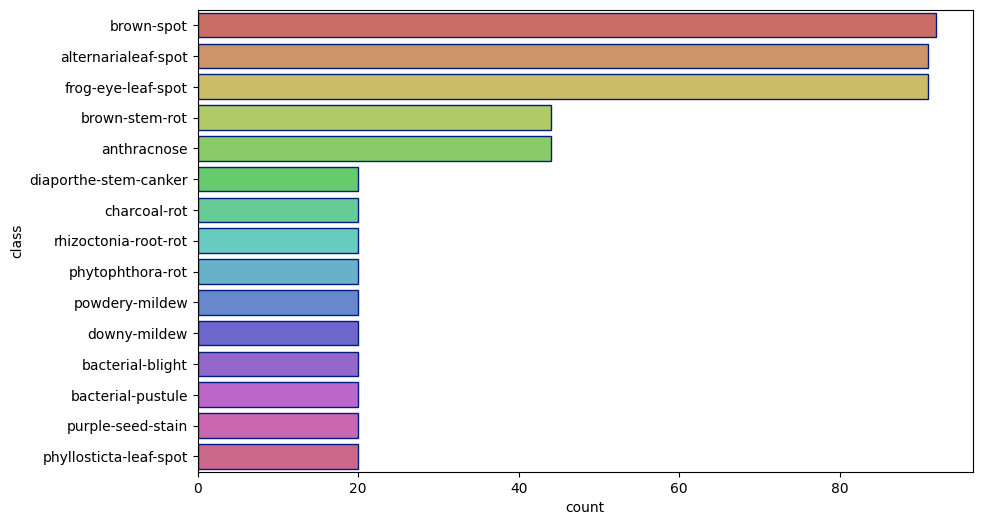

In [175]:
print(df['class'].unique().tolist(), "\n", len(df['class'].unique().tolist()))

df['class'].value_counts()

# https://seaborn.pydata.org/tutorial/color_palettes.html for color palettes
plt.figure(figsize=(10, 6))
sns.countplot(df['class'], edgecolor=sns.color_palette("dark", 15), palette=sns.color_palette("hls",15), order = df['class'].value_counts().index)
plt.xticks(rotation=-0)
plt.show()

In [176]:
from scipy.stats import chi2_contingency

features = []

for column in df.columns:
    contingency_table = pd.crosstab(df['class'], df[column])
    # Chisquare test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramer's V calculation
    n = contingency_table.sum().sum()  # Total observations
    min_dim = min(contingency_table.shape) - 1  # Minimum dimension
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    if cramers_v>0.4 and column!='class':
        features.append(column)
        print(f"Values for Column {column}: \n\tChi:{chi2}, \n\tp:{p}, \n\tdof:{dof}, \n\tcramer_v:{cramers_v}\n")

Values for Column plant-stand: 
	Chi:110.36641637112126, 
	p:4.750139170776433e-17, 
	dof:14, 
	cramer_v:0.44314955014309865

Values for Column precip: 
	Chi:564.0413041741467, 
	p:3.9790229950404105e-101, 
	dof:28, 
	cramer_v:0.7083897987100751

Values for Column temp: 
	Chi:373.89942984321596, 
	p:3.784681997690371e-62, 
	dof:28, 
	cramer_v:0.5767588216010884

Values for Column severity: 
	Chi:344.72778267687204, 
	p:2.8620132502698084e-56, 
	dof:28, 
	cramer_v:0.5538025961918367

Values for Column plant-growth: 
	Chi:341.0460097021477, 
	p:3.101891459997271e-64, 
	dof:14, 
	cramer_v:0.7790015620226411

Values for Column leaves: 
	Chi:312.01086334310855, 
	p:3.6823597709772994e-58, 
	dof:14, 
	cramer_v:0.7451036653652715

Values for Column leafspots-halo: 
	Chi:839.6529011632123, 
	p:9.793611665016568e-159, 
	dof:28, 
	cramer_v:0.8643044336689459

Values for Column leafspots-marg: 
	Chi:980.42477122377, 
	p:1.976192187275859e-188, 
	dof:28, 
	cramer_v:0.9339507649431386

Values for C

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in features:
    df[column] = le.fit_transform(df[column])

x_train, x_test, y_train, y_test = train_test_split(df[features], df['class'], test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [178]:
y_pred = tree_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8495575221238938


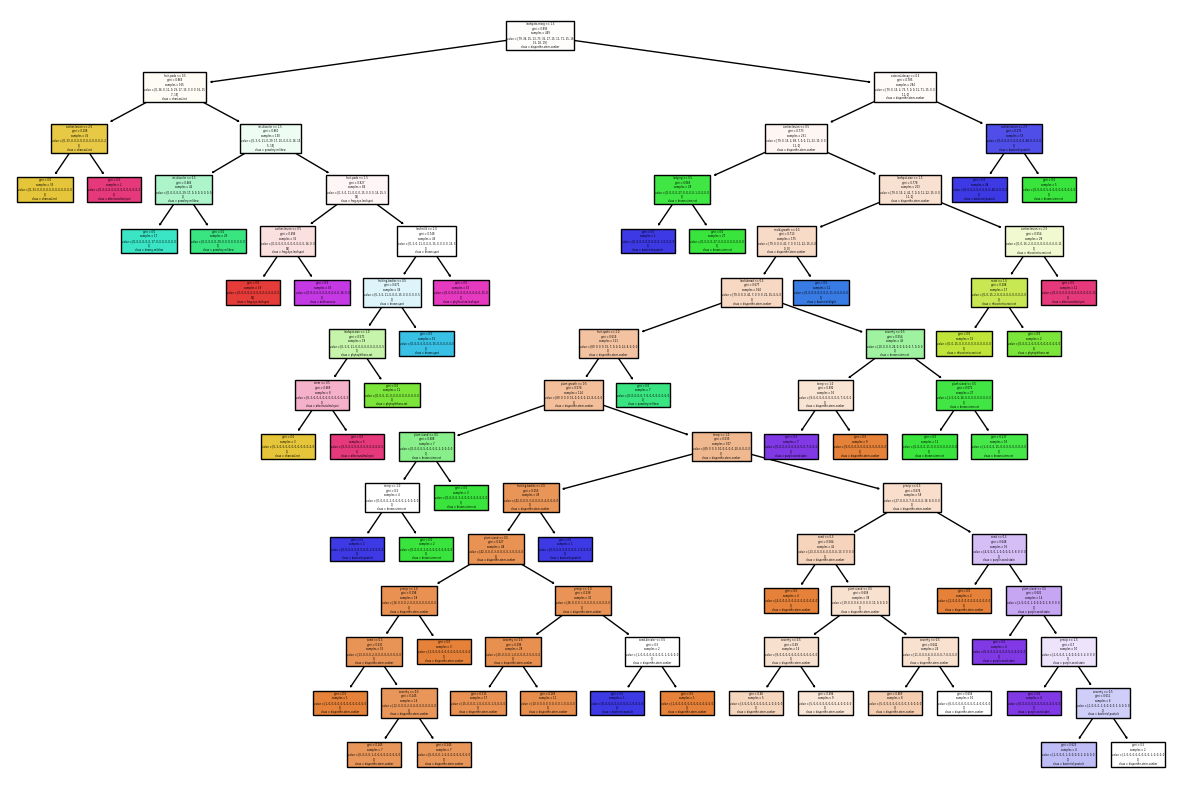

In [179]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_clf, 
                   feature_names=features,  
                   class_names=df['class'].unique().tolist(),
                   filled=True)

In [190]:
from sklearn.feature_selection import RFE


clf = DecisionTreeClassifier(random_state=42)

rfe = RFE(estimator=clf, n_features_to_select=35)

rfe.fit(x_train, y_train)

print("Features sorted by their rank:")
new_features = (sorted(zip(map(lambda x: x, rfe.ranking_), x_train.columns)))
new_features = [feature[1] for feature in new_features]

print(features[:15])
print(new_features[:15])

x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

tree_clf_rfe = DecisionTreeClassifier()
tree_clf_rfe.fit(x_train_rfe, y_train)

y_pred_rfe = tree_clf_rfe.predict(x_test_rfe)

print("Accuracy:", accuracy_score(y_test, y_pred_rfe))



Features sorted by their rank:
['plant-stand', 'precip', 'temp', 'severity', 'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers']
['canker-lesion', 'external-decay', 'fruit-pods', 'fruit-spots', 'fruiting-bodies', 'int-discolor', 'leaf-malf', 'leaf-mild', 'leaf-shread', 'leafspot-size', 'leafspots-halo', 'leafspots-marg', 'leaves', 'lodging', 'mold-growth']
Accuracy: 0.8584070796460177


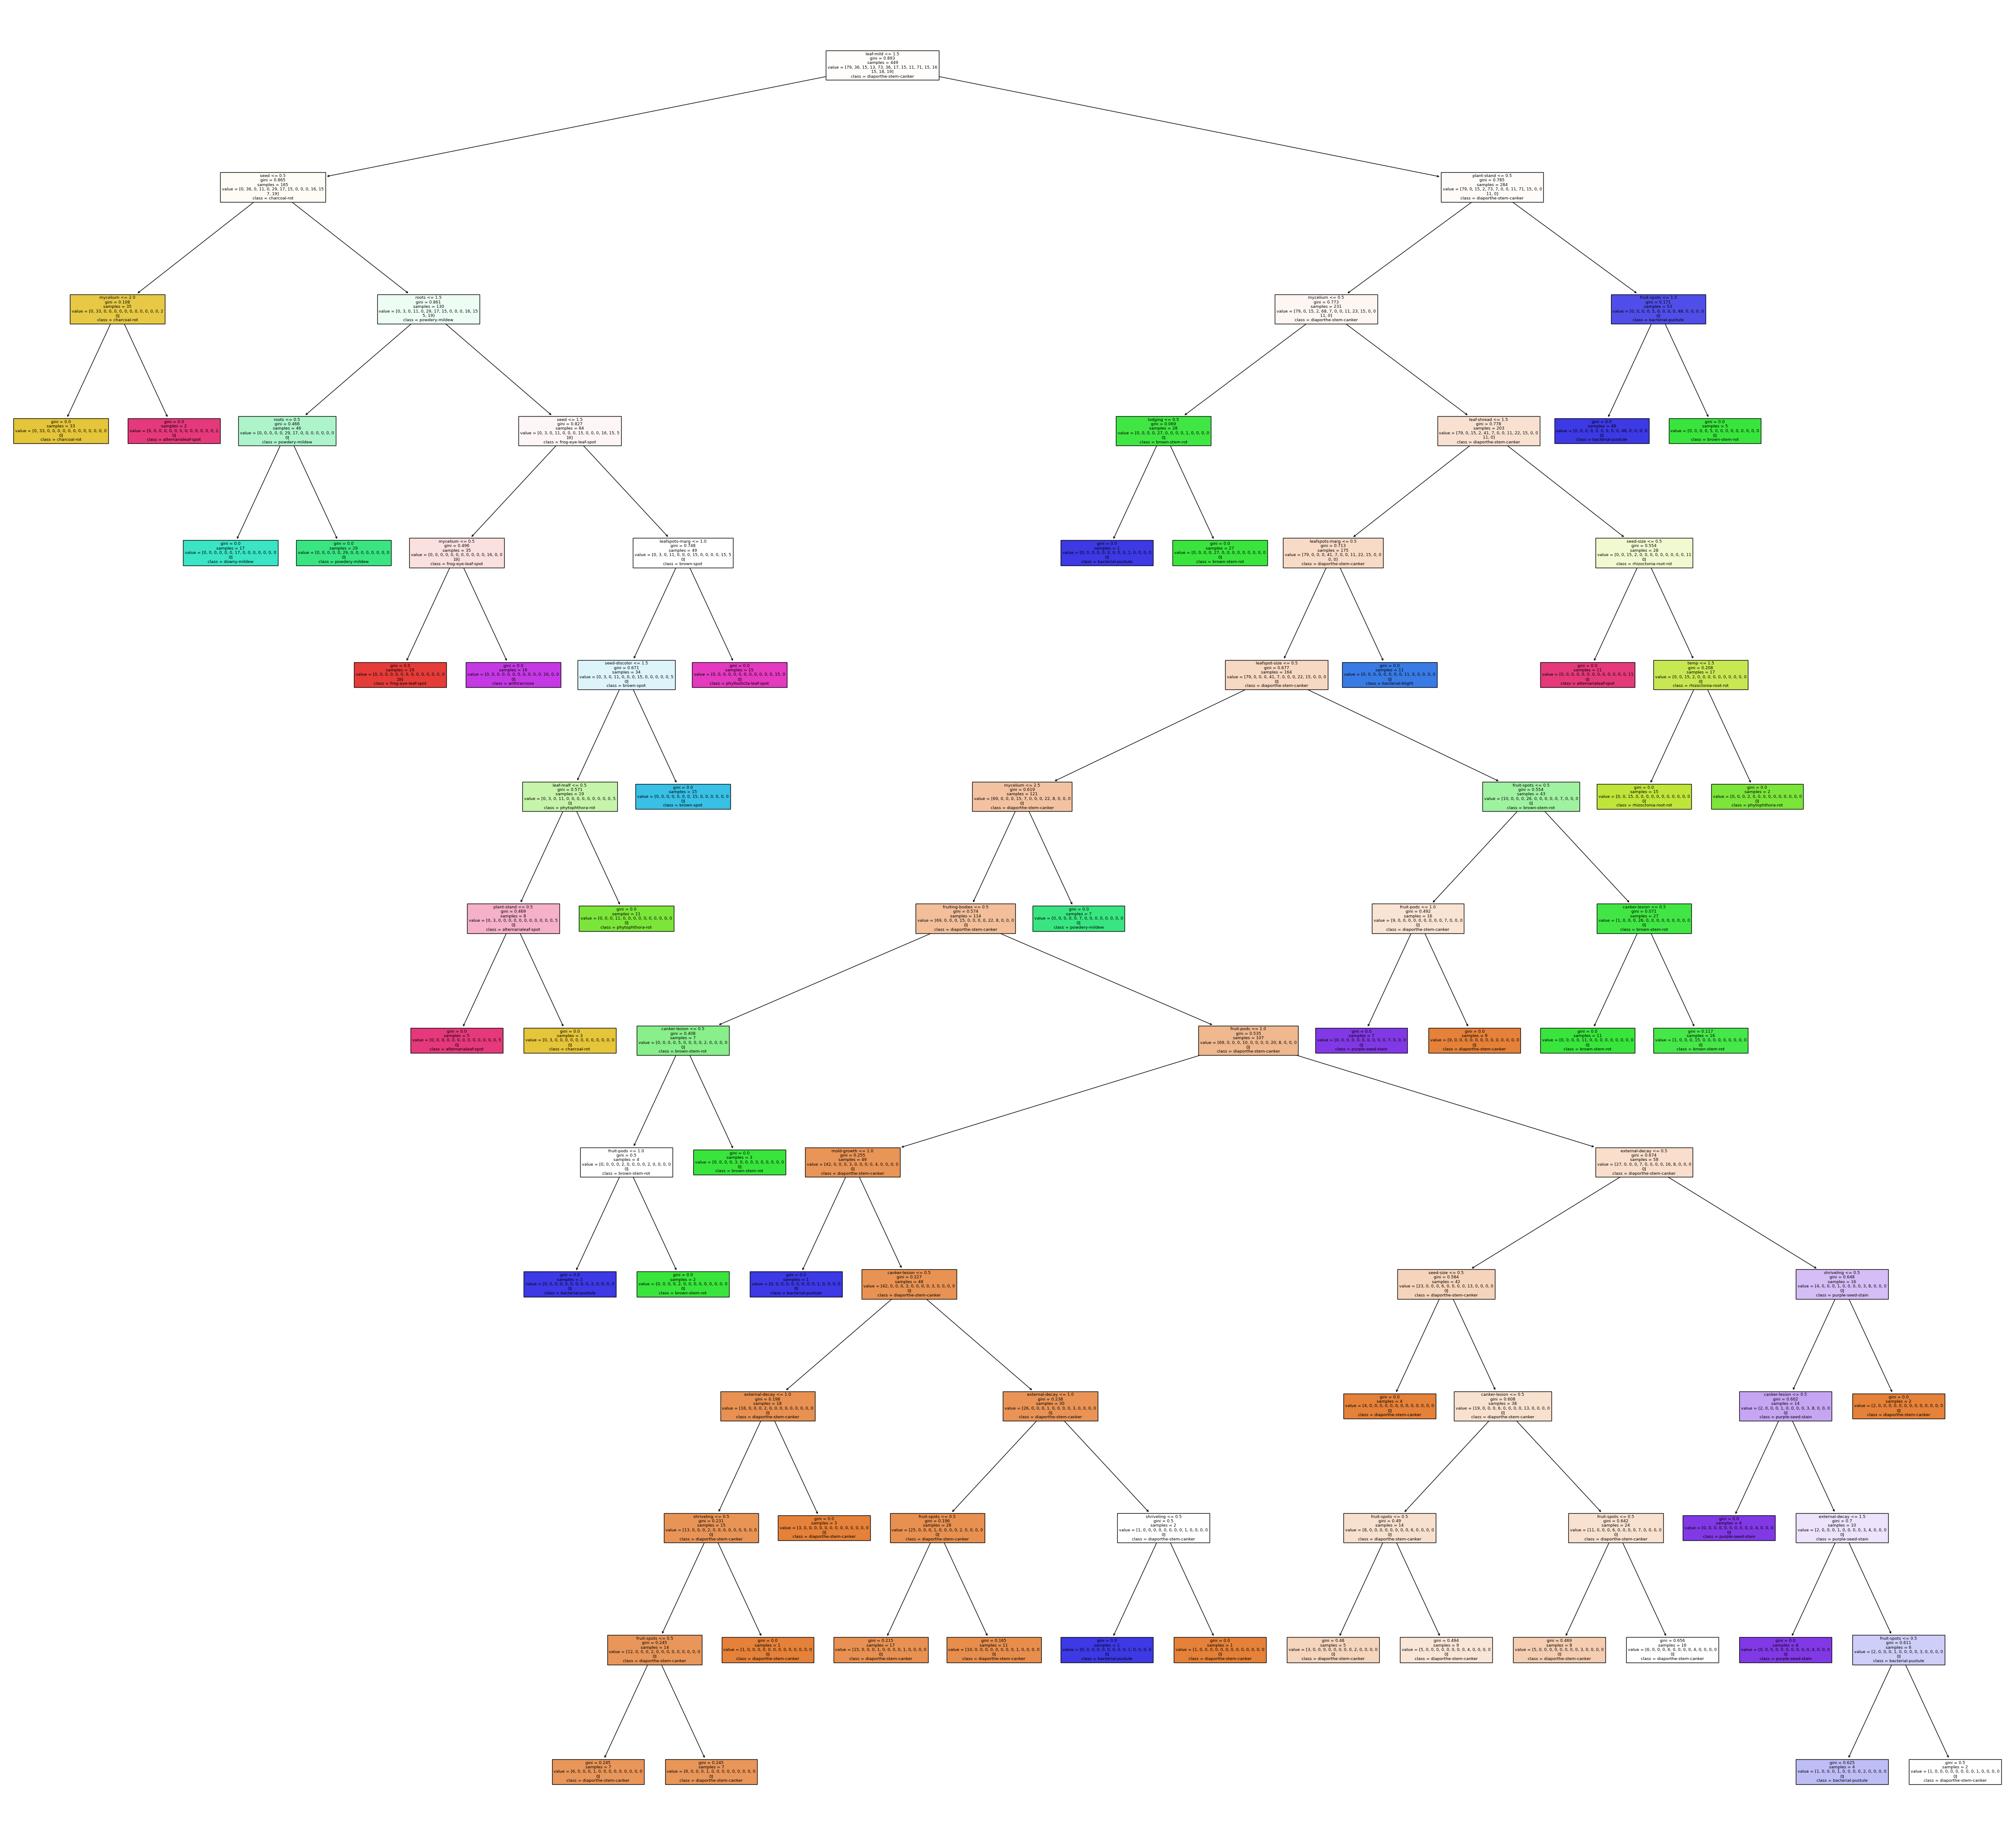

In [193]:
fig = plt.figure(figsize=(60,55))
_ = tree.plot_tree(tree_clf_rfe, 
                   feature_names=new_features,  
                   class_names=df['class'].unique().tolist(),
                   filled=True)